# Star Wars Survey 

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars=pd.read_csv('star_wars.csv',encoding='ISO-8859-1')

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
for col in star_wars.columns:
    print('*',col)

* RespondentID
* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?
* Which of the following Star Wars films have you seen? Please select all that apply.
* Unnamed: 4
* Unnamed: 5
* Unnamed: 6
* Unnamed: 7
* Unnamed: 8
* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
* Unnamed: 10
* Unnamed: 11
* Unnamed: 12
* Unnamed: 13
* Unnamed: 14
* Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
* Unnamed: 16
* Unnamed: 17
* Unnamed: 18
* Unnamed: 19
* Unnamed: 20
* Unnamed: 21
* Unnamed: 22
* Unnamed: 23
* Unnamed: 24
* Unnamed: 25
* Unnamed: 26
* Unnamed: 27
* Unnamed: 28
* Which character shot first?
* Are you familiar with the Expanded Universe?
* Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
* Do you consider yourself to be a fan of th

We can quickly spot two issues with the dataset:
* Some rows have a **NaN** respondentID 
* Some columns are named **Unnamed x** 

Let us start by tackling the first issue.

In [5]:
star_wars['RespondentID'].isnull().sum()

1

In [6]:
star_wars=star_wars[~pd.isnull(star_wars['RespondentID'])]

In [7]:
star_wars['RespondentID'].isnull().sum()

0

Take a look at the next two columns, which are:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [8]:
yes_no={'Yes':'True','No':'False'}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [9]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen?` Please select all that apply.

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* `Unnamed: 4` - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN in the mapping dictionary.

In [11]:
def helper(elem):
    if (type(elem)!=bool):
        return True
    elif elem==False:
        return False

i=1    
for col in star_wars.columns[3:9]: 
    star_wars.loc[star_wars[col].isnull(),col]=False
    star_wars[col]=star_wars[col].apply(helper)
    # Renaming the columns
    star_wars=star_wars.rename(columns={col:'seen_{}'.format(i)})
    i+=1
    

In [12]:
for col in star_wars.columns[3:9]:
    print('*', col,":")
    print(star_wars[col].value_counts(dropna=False), '\n')

* seen_1 :
True     673
False    513
Name: seen_1, dtype: int64 

* seen_2 :
False    615
True     571
Name: seen_2, dtype: int64 

* seen_3 :
False    636
True     550
Name: seen_3, dtype: int64 

* seen_4 :
True     607
False    579
Name: seen_4, dtype: int64 

* seen_5 :
True     758
False    428
Name: seen_5, dtype: int64 

* seen_6 :
True     738
False    448
Name: seen_6, dtype: int64 



The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or` NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
* `Unnamed: 10` - How much the respondent liked Star Wars: Episode II Attack of the Clones
* `Unnamed: 11` - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* `Unnamed: 12` - How much the respondent liked Star Wars: Episode IV A New Hope
* `Unnamed: 13` - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* `Unnamed: 14` - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [13]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

i=1
for col in star_wars.columns[9:15]:
    star_wars=star_wars.rename(columns={col:'ranking_{}'.format(i)})
    i+=1

Let us take a look at the cleaning we made until now:

In [14]:
star_wars.iloc[:,:15].head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0


## Finding the Highest-Ranking Movie

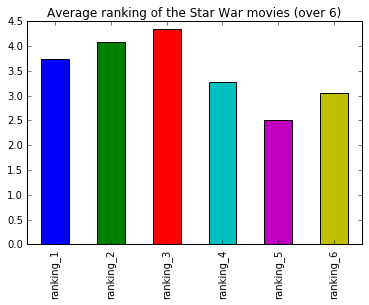

In [15]:
rankings=star_wars.iloc[:,9:15].mean()
rankings.plot(kind='bar',title='Average ranking of the Star War movies (over 6)')

Up until now, we cleaned the columns that indicated wheter a respondent saw a one of the Star War movies (1 to 6) or not. We also converted the ranking that respondents assigned to each movie to floats, and computed the average ranking for each movie.

We can observe that the 3 latest movies are better ranked on average than the earliest 3. This can be explained by the fact that the equipment and technology involved shooting the newer movies are more advanced than their predecessors, which would increase the quality of the scenes.


## Finding the Most Viewed Movie

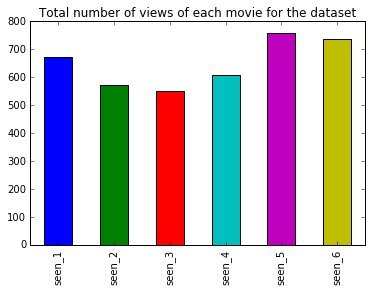

In [16]:
sum_=star_wars.iloc[:,3:9].sum()
sum_.plot(kind='bar',title='Total number of views of each movie for the dataset')

The latest 2 movies are the most watched. This can be explained by the fact that since Star Wars' release date in 1977, the franchise has accumulated fame and fans of many generation. Nonetheless, it is also much easier to access a movie in 2018 than it was in the 80 or 90's which would facilitate a higher view rate for the newer movies.

## Gender bias 

We will repeat the two previous analyses (highest-ranked and most viewed) by spliting the data into two groups: Male and Female. 

In [17]:
males=star_wars[star_wars['Gender']=='Male']
females=star_wars[star_wars['Gender']=='Female']

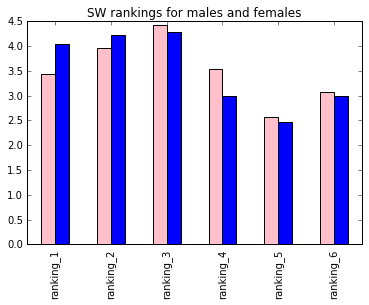

In [34]:
male_rankings=males.iloc[:,9:15].mean()
female_rankings=females.iloc[:,9:15].mean()
merged_rankings=pd.DataFrame({'males':male_rankings,'females':female_rankings})
merged_rankings.plot.bar(title='SW rankings for males and females',color=['pink','blue'],legend=False)

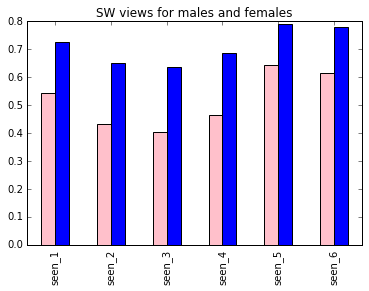

In [32]:
male_views=males.iloc[:,3:9].mean()
female_views=females.iloc[:,3:9].mean()
merged_views=pd.DataFrame({'males':male_views,'females':female_views})
merged_views.plot.bar(title='SW views for males and females',color=['pink','blue'],legend=False)

It seems that the ranking of males and females for Star War movies is pretty close. As for the number of views, we observe that more males respondents saw the movies on average. But this could be due to the fact that there are more male respondents.

In [35]:
males.shape[0]

497

In [36]:
females.shape[0]

549

There are more female than male respondents